# CSCA5632: Final Project
## Understanding Customer Churn in the Telecommunications Industry

Customer churn is a critical issue in the telecommunications industry, where they have challenges on retaining customers. This final project focuses on analyzing the [Telco Customer Churn Dataset](https://www.kaggle.com/code/vedanth777/clustering-customers-kmeans-pca) to identify the key factors that influence customer churn and develop predictive models that can help mitigate it.

## Exploratory Data Analysis

In [ ]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [110]:
# Loading the data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There doesn't seem to be any null values in the datsets.

Also, the Columns are pretty self explanatory.  But let's dive into each of them

In [112]:
data.customerID.duplicated().sum()

0

There are no duplicate entries in the dataset.

In [113]:
data.gender.unique()

array(['Female', 'Male'], dtype=object)

gender is made up of 'Female' and 'Male'

In [114]:
data.SeniorCitizen.unique()

array([0, 1], dtype=int64)

seniorCitizen has 0 and 1 for false, true values.

In [115]:
data.Partner.unique()

array(['Yes', 'No'], dtype=object)

partner has 'Yes', 'No' values

In [116]:
data.Dependents.unique()

array(['No', 'Yes'], dtype=object)

dependents has 'Yes', 'No' values

In [117]:
data.PhoneService.unique()

array(['No', 'Yes'], dtype=object)

phoneService has 'Yes', 'No' values

In [118]:
data.MultipleLines.unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

multipleLines has 'No phone service', 'No', 'Yes' values

In [119]:
data.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

internetService has 'DSL', 'Fiber optic', 'No' values

In [120]:
data.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

onlineSecurity has 'No', 'Yes', 'No internet service' values

In [121]:
data.OnlineBackup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

onlineBackup has 'No', 'Yes', 'No internet service' values

In [122]:
data.DeviceProtection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

deviceProtection has 'No', 'Yes', 'No internet service' values

In [123]:
data.TechSupport.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

techSupport has 'No', 'Yes', 'No internet service' values

In [124]:
data.StreamingTV.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

streamingTV has 'No', 'Yes', 'No internet service' values

In [125]:
data.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

streamingMovies has 'No', 'Yes', 'No internet service' values

In [126]:
data.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

contract has 'Month-to-month', 'One year', 'Two year' values

In [127]:
data.PaperlessBilling.unique()

array(['Yes', 'No'], dtype=object)

paperlessBilling has 'Yes', 'No' values

In [128]:
data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

paymentMethod has 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)' values

In [129]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

churn has 'No', 'Yes' values

### Optimizing Pandas Dataframe
Except for `customerId`, `tenure`, `MonthlyCharges`, `TotalCharges`, all columns are categorical.  Let's update each column as categorical to improve performance

In [130]:
# Convert columns to categorical
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_columns:
    data[col] = data[col].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

We are able to reduce the memory usage from 1.1Mb to 339KB

`TotalCharges` should be float64.  There must be a NaN values.

In [131]:
# Check for non-numeric values in TotalCharges
non_numeric_total_charges = pd.to_numeric(data['TotalCharges'], errors='coerce').isna()
print(f'Non-numeric TotalCharges values: {non_numeric_total_charges.sum()}')

# Remove rows with non-numeric TotalCharges
data = data[~non_numeric_total_charges]

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.info()

Non-numeric TotalCharges values: 11
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   ca

In [132]:
# Summary statistics for numerical columns
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


There doesn't seem to be any outlier in the numerical data, let's also graph them

### Graphs

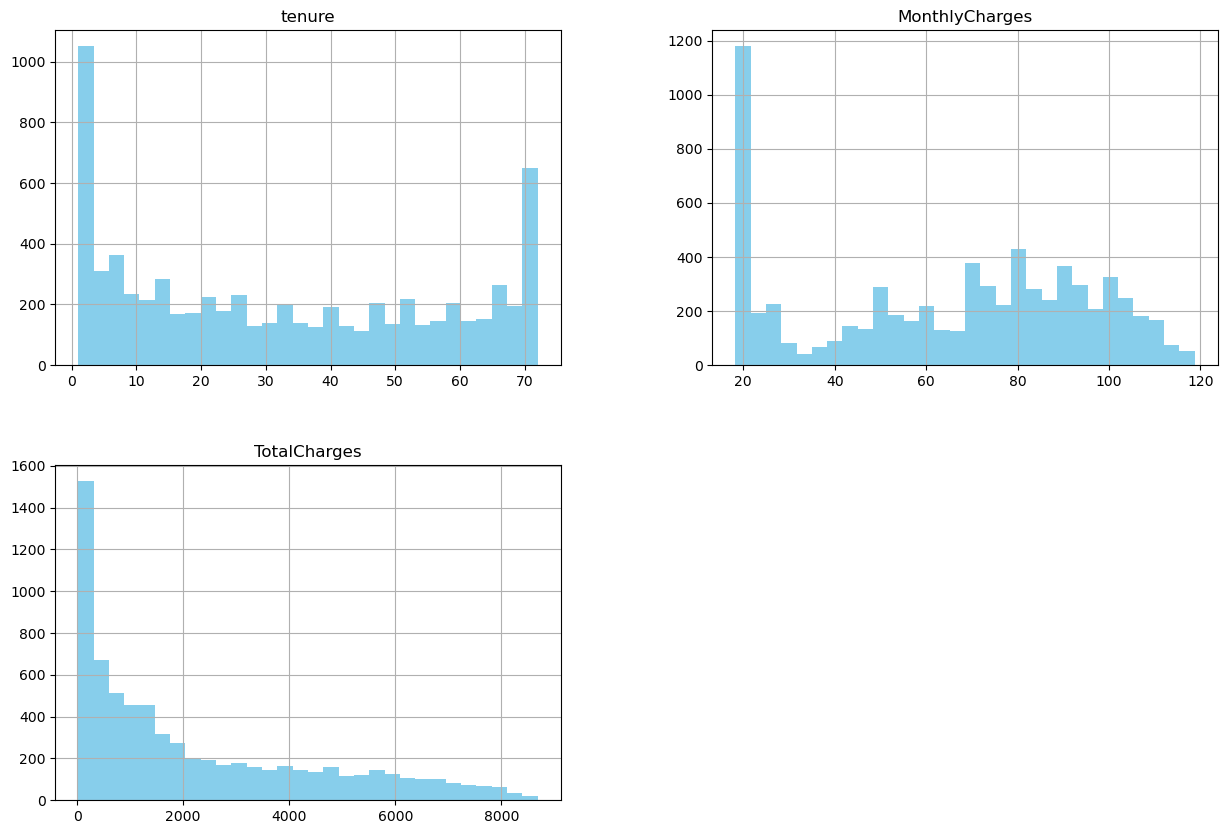

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.show()

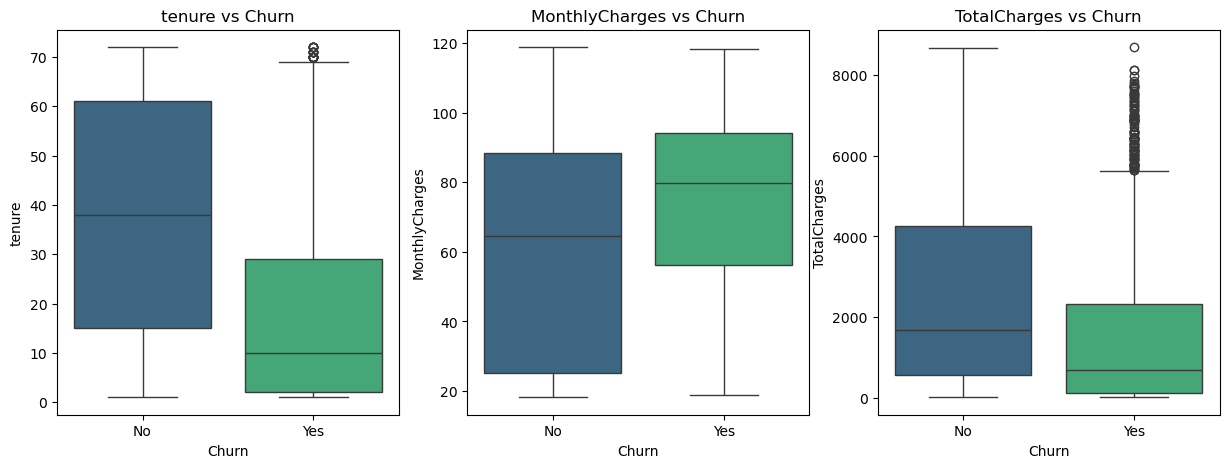

In [134]:
plt.figure(figsize=(15, 5))
for i, column in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=column, data=data,  palette='viridis', hue=data.Churn)
    plt.title(f'{column} vs Churn')
plt.show()

While there are some outliers of tenure and TotalCharges when the Churn is true, this makes sense, it is less likely to leave longer duration of stay you have with the company.  So we will keep these outliers in the analysis

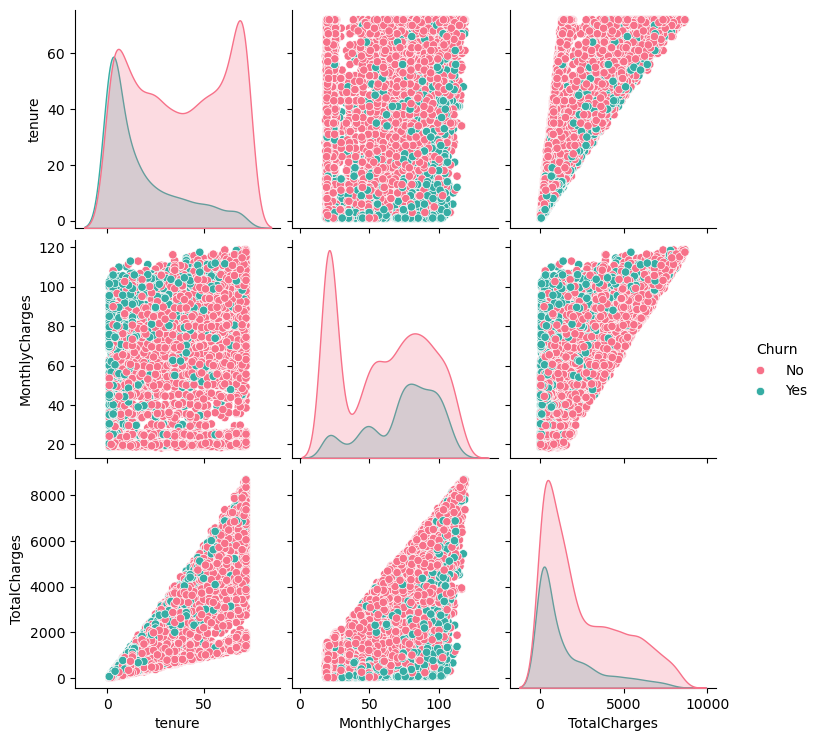

In [135]:
sns.pairplot(data, palette='husl', hue='Churn')

As you can see, TotalCharges and tenure are higly correlated.  As more you stay with the company, more charges you will accrue.  There doesn't seem to be a direct correlation between, Monthly Charge and tenure.  In other words, how long you stay does not depend on how much you pay monthly. 

<Axes: >

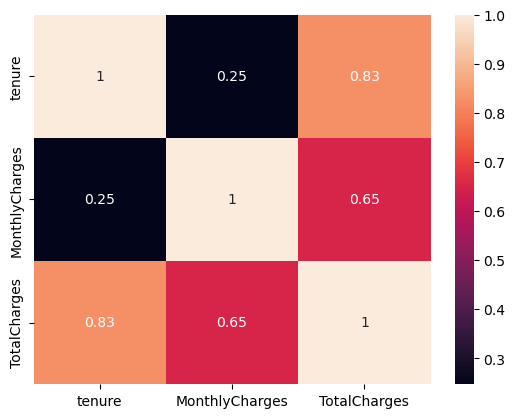

In [136]:
sns.heatmap(data.corr(), annot=True)

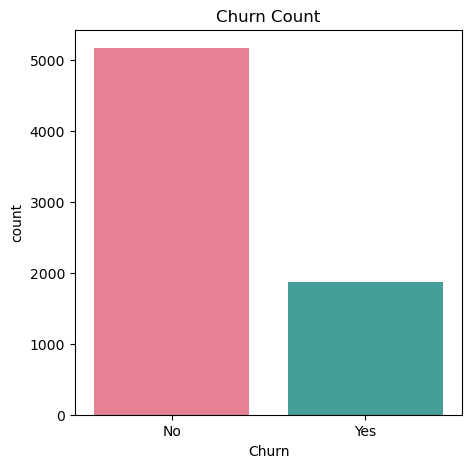

In [137]:
# Countplot for Churn
plt.figure(figsize=(5, 5))
sns.countplot(x='Churn', data=data, palette='husl', hue='Churn')
plt.title('Churn Count')
plt.show()

There is a bit of imbalance of data for Churn data.

## Unsupervised Learning

We will perform unsupervised learning with KMeans and PCA

### Data Cleaning

Since most of the data set is categorical, let's perform One Hot Encoding

In [138]:
categorical_columns = data.select_dtypes('category').columns



# exclude Churn
categorical_columns = categorical_columns.drop('Churn')

print(categorical_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [139]:
encoded_data = pd.get_dummies(data, columns=categorical_columns)

In [140]:
encoded_data.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [141]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   customerID                               7032 non-null   object  
 1   tenure                                   7032 non-null   int64   
 2   MonthlyCharges                           7032 non-null   float64 
 3   TotalCharges                             7032 non-null   float64 
 4   Churn                                    7032 non-null   category
 5   gender_Female                            7032 non-null   uint8   
 6   gender_Male                              7032 non-null   uint8   
 7   SeniorCitizen_0                          7032 non-null   uint8   
 8   SeniorCitizen_1                          7032 non-null   uint8   
 9   Partner_No                               7032 non-null   uint8   
 10  Partner_Yes                         

In [142]:
encoded_data.drop('customerID', axis=1, inplace=True)

In [143]:
# Separate features and target.
X = encoded_data.drop(columns=['Churn'])
y = encoded_data['Churn']

# Standardize the features (important for KMeans).
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [144]:
# turn 'Churn' into binary
y = y.replace({'Yes': 1, 'No': 0})

In [145]:
X_scaled

array([[-1.28024804, -1.16169394, -0.99419409, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 0.06430269, -0.26087792, -0.17373982, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-1.23950408, -0.36392329, -0.95964911, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.87280842, -1.17000405, -0.85451414, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-1.15801615,  0.31916782, -0.87209546, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 1.36810945,  1.35793167,  2.01234407, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

### KMeans with 2 clusters

We'll start the clustering with Simple KMeans Clustering with 2 clusters

In [146]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

In [147]:
accuracy_score(y, clusters)

0.5501990898748578

Simplay assuming the cluster of size 2 represents the churn only has accuracy level of 2.  We could've gotten accuracy level of approximately 73% by simply always guessing that there is no churn.  So this is not very good.

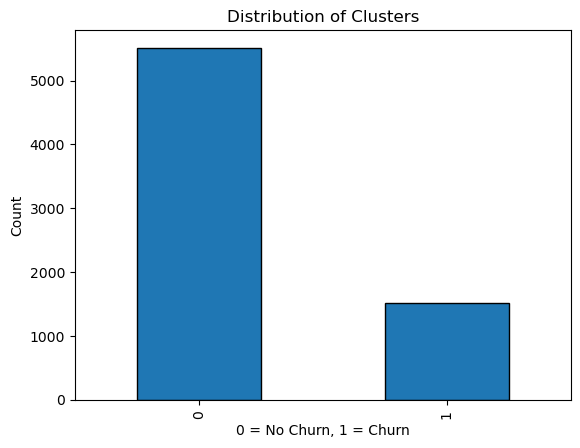

In [148]:
data['clusters'] = clusters

ax = data.clusters.value_counts().sort_index().plot.bar(edgecolor='black')

# Customize the plot
ax.set_xlabel('0 = No Churn, 1 = Churn')
ax.set_ylabel('Count')
ax.set_title('Distribution of Clusters')

# Display the plot
plt.show()

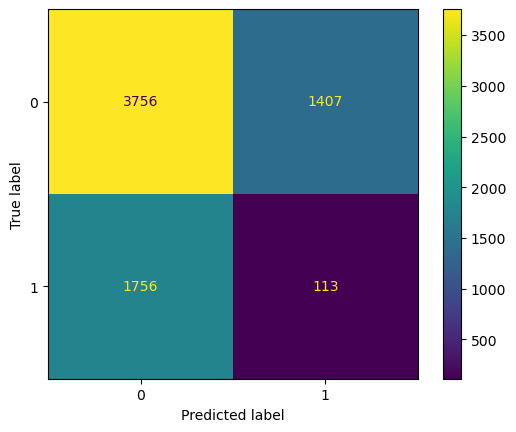

In [149]:

ConfusionMatrixDisplay(confusion_matrix(y, clusters)).plot()

Welp, accuracy score is only 55%, let's see if some hyperparameter tuning will help

In [150]:
kmeans = KMeans(n_clusters=2, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

In [151]:
accuracy_score(y, clusters)

0.5501990898748578

### KMeans with 10 clusters

We'll try updating the cluster size to 10.

In [152]:
kmeans = KMeans(n_clusters=10, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

In [153]:
data['clusters'] = clusters 
data.clusters.value_counts()

2    1068
9     829
0     802
7     718
5     700
3     680
8     663
4     646
6     512
1     414
Name: clusters, dtype: int64

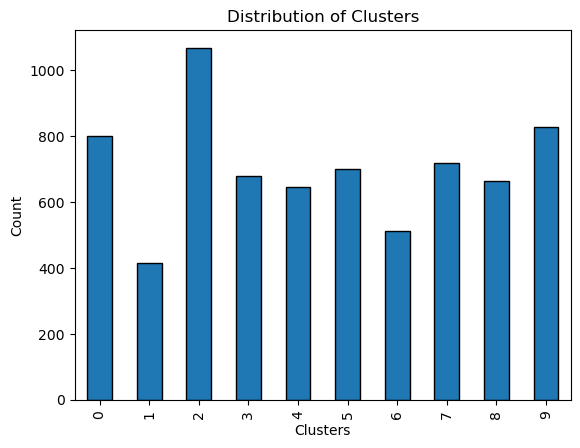

In [154]:
data['clusters'] = clusters

ax = data.clusters.value_counts().sort_index().plot.bar(edgecolor='black')

# Customize the plot
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_title('Distribution of Clusters')

# Display the plot
plt.show()

10 Clusters are well distributed.

In [155]:
data['Churn_binary'] = data['Churn'].replace({'Yes': 1, 'No': 0})

In [156]:
data['Churn_binary'] = pd.to_numeric(data['Churn_binary'])

In [157]:
cluster_churn_means = data.groupby('clusters')['Churn_binary'].mean()



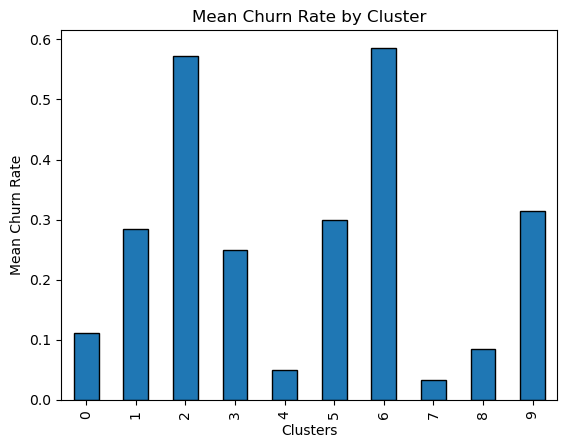

In [158]:

ax = cluster_churn_means.plot(kind='bar', edgecolor='black')

# Customize the plot
ax.set_xlabel('Clusters')
ax.set_ylabel('Mean Churn Rate')
ax.set_title('Mean Churn Rate by Cluster')

# Display the plot
plt.show()

With 10 clusters, the chances of the churn varies.  For example, cluster 4 only had 4.95% of churn where as cluster 6 had whooping 58.59% of churns.  This means, increasing the cluster size to 10 have done a better job of capturing different groups.  Marketing of the telecom company could focus on keeping the individuals on cluster 6 instead of cluster 4.

In [159]:
data[data['clusters'] == 6].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,clusters,Churn_binary
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,6,0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,6,0
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,6,0
52,6575-SUVOI,Female,1,Yes,No,25,Yes,Yes,DSL,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),69.50,1752.65,No,6,0
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes,6,1


In [160]:
data[data['clusters'] == 4].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,clusters,Churn_binary
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,4,0
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,4,0
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,4,0
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No,4,0
41,9489-DEDVP,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No,4,0


In [161]:

cluster_churn_mapping = data.groupby('clusters')['Churn_binary'].agg(lambda x: x.value_counts().index[0])

# Use the mapping to predict churn for each observation
data['predicted_churn'] = data['clusters'].map(cluster_churn_mapping)
# Calculate accuracy
accuracy = accuracy_score(data['Churn_binary'], data['predicted_churn'])
print(f'Accuracy: {accuracy}')


Accuracy: 0.7686291240045506


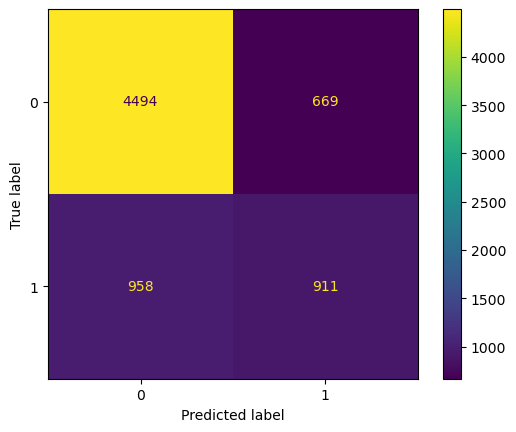

In [162]:
ConfusionMatrixDisplay(confusion_matrix(data['Churn_binary'], data['predicted_churn'])).plot()

We were able to bring up the accuracy rate from 55% to 77% by increasing the cluster size from 2 to 10.  Let's see if we can use an elbow method to find a good cluster size between 2 - 20.

### Hyperparameter tuning with K
Using elbow method to find the right k

In [163]:
def find_accuracy(data):
    print(data.clusters.unique().size)
    cluster_churn_mapping = data.groupby('clusters')['Churn_binary'].agg(lambda x: x.value_counts().index[0])

    cluster_churn_mapping_dict = cluster_churn_mapping.to_dict()
    print("Cluster to Predicted Churn Mapping:")
    print(cluster_churn_mapping_dict)


    # Use the mapping to predict churn for each observation
    data['predicted_churn'] = data['clusters'].map(cluster_churn_mapping)
    # Calculate accuracy
    accuracy = accuracy_score(data['Churn_binary'], data['predicted_churn'])
    print(f'Accuracy: {accuracy}')
    return accuracy

2
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0}
Accuracy: 0.7342150170648464
3
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 0}
Accuracy: 0.7342150170648464
4
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 0, 3: 0}
Accuracy: 0.7342150170648464
5
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 1, 3: 0, 4: 0}
Accuracy: 0.7383390216154722
6
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0}
Accuracy: 0.75
7
Cluster to Predicted Churn Mapping:
{0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0}
Accuracy: 0.7539817974971559
8
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0}
Accuracy: 0.7541240045506257
9
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1}
Accuracy: 0.7633674630261661
10
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}
Accuracy: 0.7686291240045506
11
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6

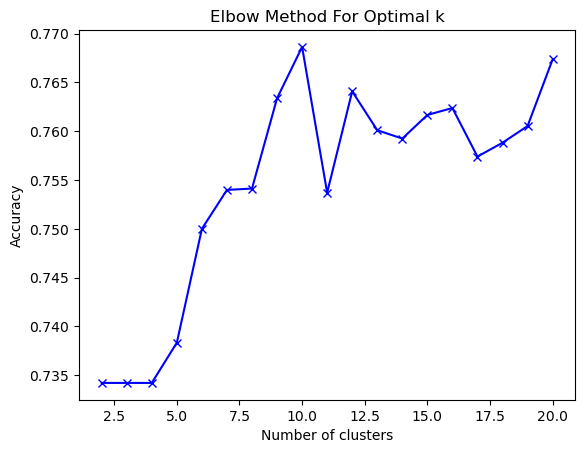

In [164]:
# Elbow method to find the optimal number of clusters\n

accuracy_scores = []
K = range(2, 21)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
    kmeans.fit(X_scaled)
    clusters = kmeans.labels_
    data['clusters'] = clusters
    accuracy_scores.append(find_accuracy(data))

plt.plot(K, accuracy_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Elbow Method For Optimal k')

plt.show()

It seems like the cluster size of 10 had the best result.

## Using SMOTE and PCA

One of the probme that we see is that our data is unbalanced.  We could have received pretty high accuracy by simply assuming everythin as No-Churn. 
There are less churn than no-churns.  

Another problem is that because churn terminates any more data collection, growth of some data such as tenure and total charges stops growing.  In other words, we have some correllation.

Let's see if we can deal with them using SMOTE and PCA

### SMOTE (Synthetic Minority Over-sampling Technique)

In [165]:
from imblearn.over_sampling import SMOTE

In [166]:
oversample = SMOTE()
X_scaled_smote, y_smote = oversample.fit_resample(X_scaled,data['Churn_binary'])

In [167]:
y_smote.value_counts()

0    5163
1    5163
Name: Churn_binary, dtype: int64

<Axes: >

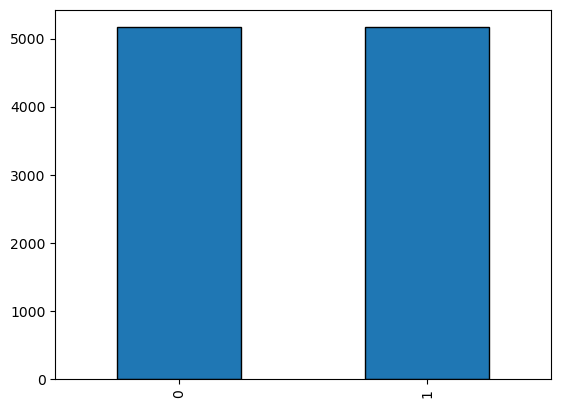

In [168]:
y_smote.value_counts().plot(kind='bar', edgecolor='black')

2
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1}
Accuracy: 0.6055587836529149
3
Cluster to Predicted Churn Mapping:
{0: 0, 1: 0, 2: 1}
Accuracy: 0.7193492155723417
4
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 0}
Accuracy: 0.7037575053263606
5
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 1, 3: 0, 4: 0}
Accuracy: 0.7222545031958164
6
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 1}
Accuracy: 0.7190586868099942
7
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1}
Accuracy: 0.7196397443346891
8
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1}
Accuracy: 0.7166376137904319
9
Cluster to Predicted Churn Mapping:
{0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1}
Accuracy: 0.7201239589386016
10
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0}
Accuracy: 0.715281812899477


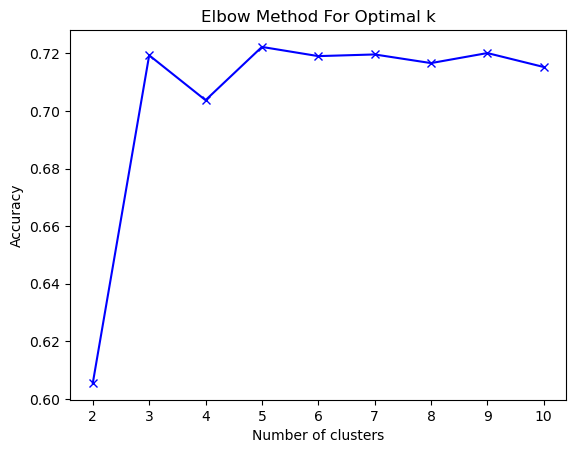

In [169]:


accuracy_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
    kmeans.fit(X_scaled_smote)
    clusters = kmeans.labels_
    df = pd.DataFrame({'clusters': clusters, 'Churn_binary': y_smote})
    accuracy_scores.append(find_accuracy(df))

plt.plot(K, accuracy_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Elbow Method For Optimal k')

plt.show()

Using SMOTE, Cluster size 3 seems to be ideal and accuracy although still not great, should be more accurate representation of the model accuracy.

## PCA

Let's also apply PCA since there are higly correllated columns in our dataset such as MonthlyCharges, TotalCharges, and Tenure

In [230]:
# Reloading the dataset

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Check for non-numeric values in TotalCharges
non_numeric_total_charges = pd.to_numeric(data['TotalCharges'], errors='coerce').isna()
print(f'Non-numeric TotalCharges values: {non_numeric_total_charges.sum()}')

# Remove rows with non-numeric TotalCharges
data = data[~non_numeric_total_charges]

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])


y = data['Churn'].replace({'Yes': 1, 'No': 0})

X = data.drop(columns=['customerID', 'Churn'])
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)



scaler = StandardScaler()
X = scaler.fit_transform(X)

oversample = SMOTE()
X_scaled_smote, y_smote = oversample.fit_resample(X,y)


Non-numeric TotalCharges values: 11


In [231]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled_smote)

In [232]:
X_pca

array([[ 3.07533698e-03, -2.61289761e+00,  3.89733431e+00, ...,
         4.50242469e-01,  3.24568709e-01,  6.75884146e-01],
       [ 2.96258341e-01, -1.98614163e-02,  1.46384286e+00, ...,
         4.82857893e-01,  3.44393643e-01,  1.07342163e+00],
       [ 2.92367421e-01, -1.46579870e+00,  1.08457738e+00, ...,
        -9.66124017e-01,  2.73674502e-01,  3.58369315e-01],
       ...,
       [ 6.62428961e-02, -2.78039209e+00,  4.08423491e+00, ...,
        -5.75387469e-01, -1.17736400e+00,  6.98698687e-01],
       [-2.43767414e+00, -2.77596120e-01, -3.93284410e-01, ...,
        -1.70042700e-01,  1.95682905e-01,  2.38468098e-01],
       [-1.61293366e-01, -2.59741219e+00, -5.96709613e-01, ...,
         3.77486714e-02,  1.05761457e-01,  1.13786473e+00]])

In [233]:
# convert to dataframe
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, 11)])

In [234]:
X_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.003075,-2.612898,3.897334,1.881108,-0.936969,0.957767,-0.879398,0.450242,0.324569,0.675884
1,0.296258,-0.019861,1.463843,-2.520012,0.640458,-1.572107,1.957161,0.482858,0.344394,1.073422
2,0.292367,-1.465799,1.084577,-2.487157,0.590393,-0.458509,1.379801,-0.966124,0.273675,0.358369
3,-0.249835,-0.004606,5.280153,0.128243,0.817645,-1.091718,1.023955,0.733732,-0.758968,1.674384
4,-0.402784,-2.870655,-0.829528,-0.550022,-0.261682,0.310772,-1.282744,0.189545,-0.064794,0.520022
...,...,...,...,...,...,...,...,...,...,...
10321,-2.252992,1.626365,-1.042133,0.366032,-0.867308,-1.066886,-0.032949,1.859202,0.887025,0.195396
10322,-1.322396,-0.872081,-1.264424,-0.241161,0.501160,-0.507455,0.247179,-0.478375,-1.154657,-1.090513
10323,0.066243,-2.780392,4.084235,1.464730,-0.130809,-0.141992,-0.240807,-0.575387,-1.177364,0.698699
10324,-2.437674,-0.277596,-0.393284,-0.150319,0.095683,-1.800298,-1.793981,-0.170043,0.195683,0.238468


In [235]:
y_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

2
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1}
Accuracy: 0.5081348053457292
3
Cluster to Predicted Churn Mapping:
{0: 1, 1: 0, 2: 0}
Accuracy: 0.7120859965136549
4
Cluster to Predicted Churn Mapping:
{0: 1, 1: 0, 2: 0, 3: 0}
Accuracy: 0.7005616889405385
5
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 0, 4: 1}
Accuracy: 0.7176060429982568
6
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0}
Accuracy: 0.7177997288398218
7
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0}
Accuracy: 0.7177028859190393
8
Cluster to Predicted Churn Mapping:
{0: 1, 1: 0, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1}
Accuracy: 0.7177997288398218
9
Cluster to Predicted Churn Mapping:
{0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1}
Accuracy: 0.7175092000774743
10
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 1, 9: 0}
Accuracy: 0.7130544257214798
11
Cluster to Predicted Churn Mapping:
{0: 1, 1: 1, 2: 0, 3: 0,

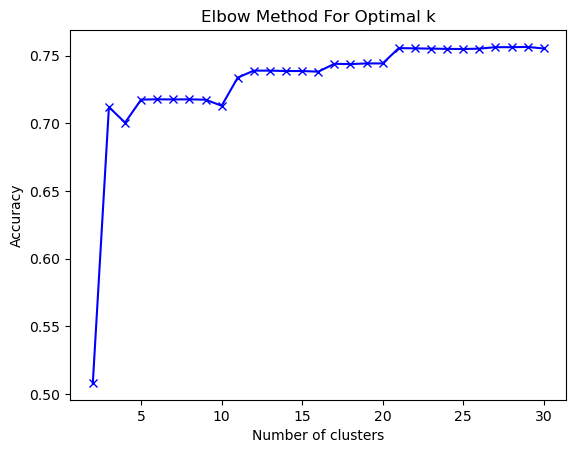

In [237]:
accuracy_scores = []
K = range(2, 31)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42, algorithm='elkan', max_iter=1000)
    kmeans.fit(X_pca_df)
    clusters = kmeans.labels_
    X_pca_df['clusters'] = clusters
    X_pca_df['Churn_binary'] = y_smote
    accuracy_scores.append(find_accuracy(X_pca_df))

plt.plot(K, accuracy_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Elbow Method For Optimal k')

plt.show()

By Joining PCA, SMOTE, KMeans, we are able to get the accuracy level up to 75%.  Although it's still under fitting, this may be our most accurate model yet.

# Conclusion

We perform unsupervised learning, KMeans and PCA to cluster users so that we can reduce churn by focusing marketing in more targetted group.

We first took the naive approach to exactly have KMeans cluster the users into two, hoping that those two clusters would represent the churn.  It was very inaccurate.  Then, we increased the cluster sizes then mapped each cluster to churn group and non-churn group.  This approach was much better, and we were able to see that some cluster had very low expected churn possibilities. 

Then we used SMOTE to deal with data imbalance, then used PCA to deal with correlation between the data.  Although PCA hurts the explainability of the data, we were able to get the accuracy up to 75%.

Although we were not able to increase our accruracy over 75%, this clustering results should be sufficient for the company's marketing derpartment.  By having the marketing department focus only on the clusters of users that had higher churn possibilities, company could spend their resources more efficiently.

## Further Studies

One analysis was that higher the tenure, churn rate becomes lower.  In other words, longer you stay with the company, it is likely you will continue to stay with the company.  Since these users that are royal to the companies may have different reasons to leave than users who have not been with the company as much, further studies are suggested that separates these datasets.  So skewing of the data doesn't hurt the models.
